# Project Overview

# Import Packages and Data


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
logins = pd.read_json('logins.json')
users = pd.read_json('ultimate_data_challenge.json')

# Part 1 - EDA

In [3]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
logins = logins.sort_values('login_time')
logins['visit'] = 1
logins.tail()

,login_time,visit
93136,1970-04-13 18:48:52,1
93137,1970-04-13 18:50:19,1
93139,1970-04-13 18:54:02,1
93141,1970-04-13 18:54:23,1
93140,1970-04-13 18:57:38,1


In [6]:
logins['login_time'].describe()

count                            93142
mean     1970-02-26 19:09:39.779648279
min                1970-01-01 20:12:16
25%         1970-02-04 10:37:19.750000
50%         1970-03-01 06:33:05.500000
75%         1970-03-22 04:01:10.750000
max                1970-04-13 18:57:38
Name: login_time, dtype: object

In [7]:
# aggregate login data over 15 minute intervals
logins_15min = logins.resample('15min', on='login_time', label='right').sum()
logins_15min

,visit
login_time,
1970-01-01 20:15:00,2
1970-01-01 20:30:00,6
1970-01-01 20:45:00,9
1970-01-01 21:00:00,7
1970-01-01 21:15:00,1
...,...
1970-04-13 18:00:00,5
1970-04-13 18:15:00,5
1970-04-13 18:30:00,2


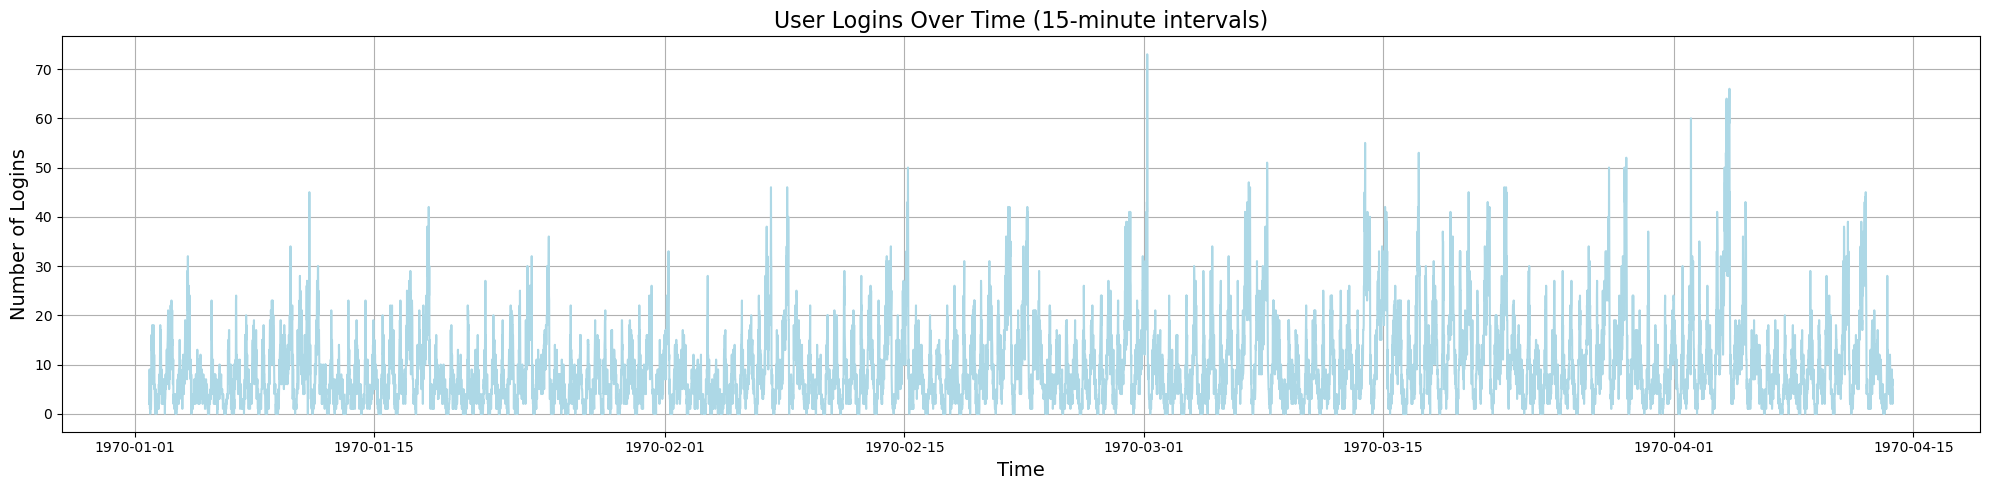

In [8]:
# plot resampled data for 15 min intervals
fig, ax = plt.subplots(figsize=(20,5))
plt.plot(logins_15min['visit'], color='lightblue')
ax.set_title('User Logins Over Time (15-minute intervals)', fontsize=16)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Number of Logins', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

The chart that aggregates user logins in 15 minute intervals shows a lot of variability and spikes in short intervals. 

In [9]:
# resample data in hourly time windows
logins_hourly = logins.resample('60min', on='login_time', label='right').sum()
logins_hourly.head()

,visit
login_time,
1970-01-01 21:00:00,24
1970-01-01 22:00:00,9
1970-01-01 23:00:00,21
1970-01-02 00:00:00,58
1970-01-02 01:00:00,53


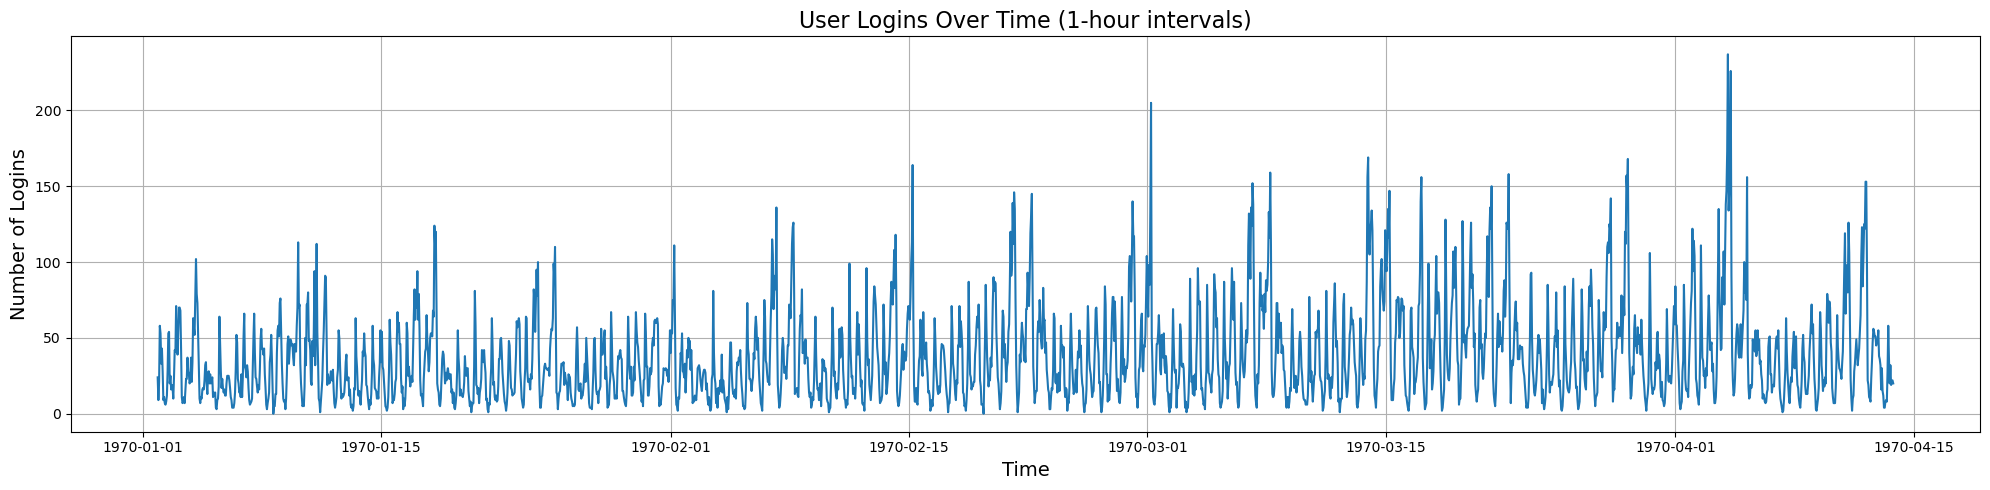

In [10]:
# plot resampled data for 1 hour intervals
fig, ax = plt.subplots(figsize=(20,5))
plt.plot(logins_hourly)
ax.set_title('User Logins Over Time (1-hour intervals)', fontsize=16)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Number of Logins', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

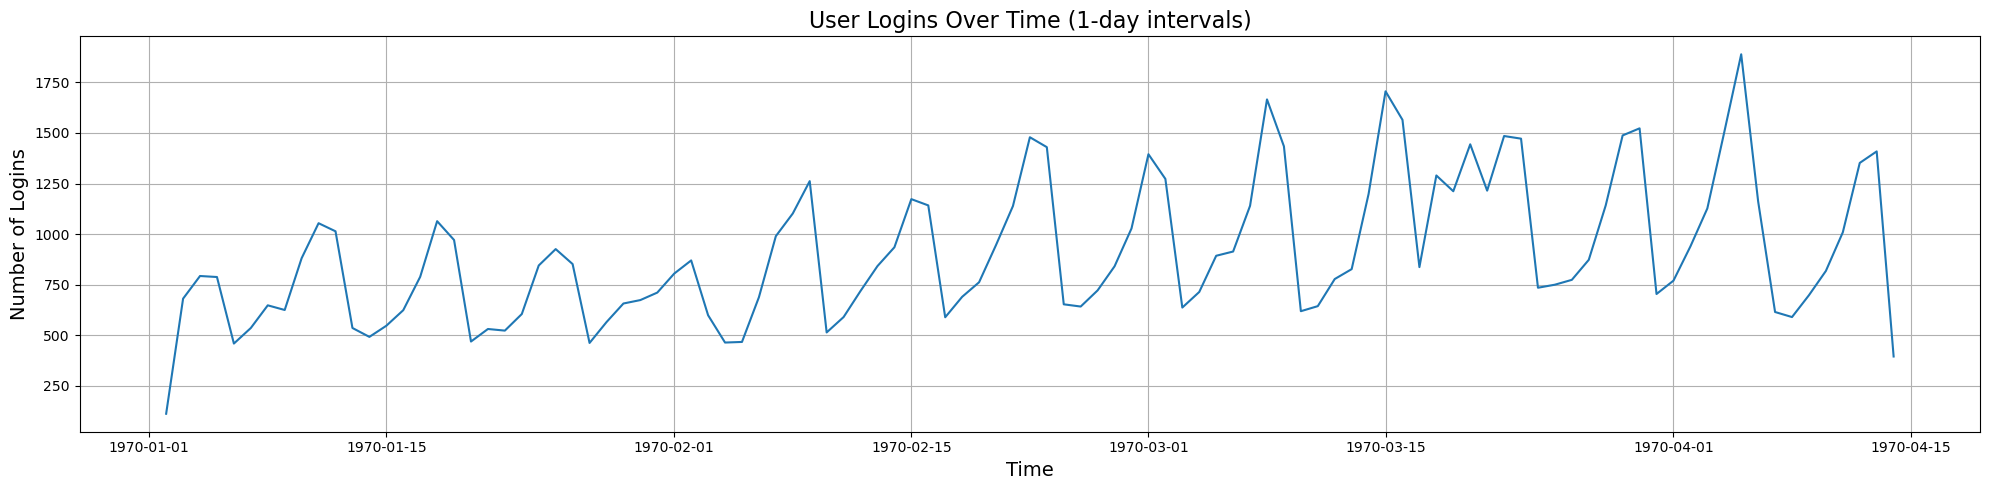

In [11]:
# resample for 1 day intervals
logins_daily = logins.resample('1D', on='login_time', label='right').sum()

fig, ax = plt.subplots(figsize=(20,5))
plt.plot(logins_daily)
ax.set_title('User Logins Over Time (1-day intervals)', fontsize=16)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Number of Logins', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

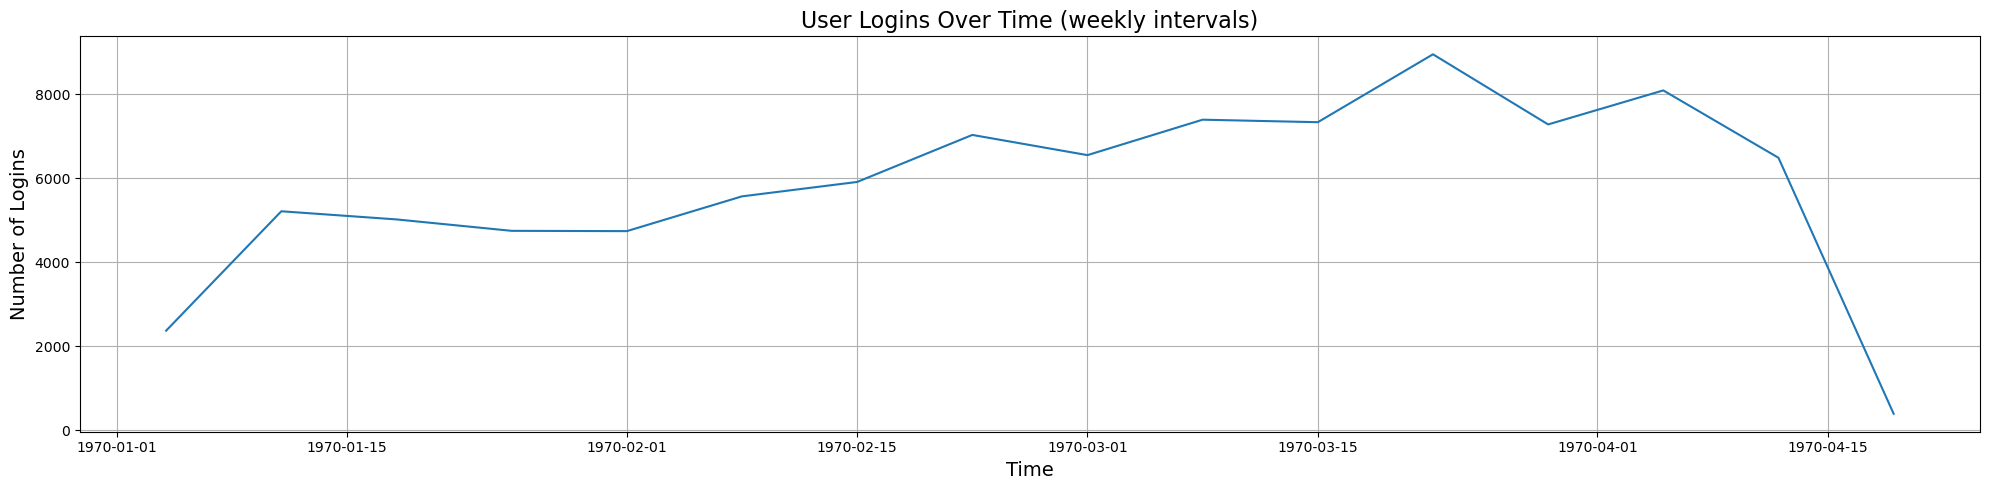

In [12]:
# resample for weekly intervals
logins_weekly = logins.resample('W', on='login_time', label='right').sum()

fig, ax = plt.subplots(figsize=(20,5))
plt.plot(logins_weekly)
ax.set_title('User Logins Over Time (weekly intervals)', fontsize=16)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Number of Logins', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

## Rolling Averages

In [13]:
# calculate rolling averages over 24 hours and 7 days
logins_15min['24h_rolling_avg'] = logins_15min['visit'].rolling(window=96).mean()
logins_15min['7d_rolling_avg'] = logins_15min['visit'].rolling(window=672).mean()

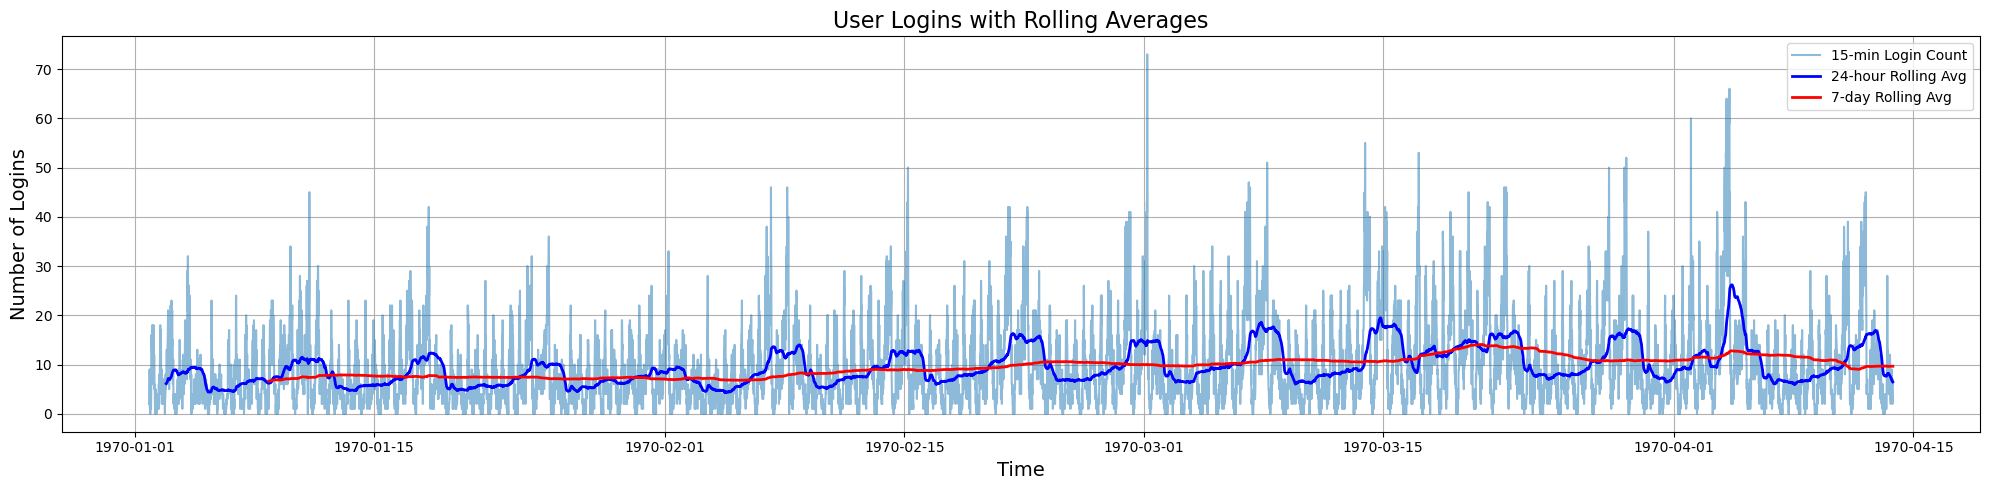

In [14]:
# plot rolling averages
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(logins_15min['visit'], label='15-min Login Count', alpha=0.5)
ax.plot(logins_15min['24h_rolling_avg'], label='24-hour Rolling Avg', color='blue', linewidth=2)
ax.plot(logins_15min['7d_rolling_avg'], label='7-day Rolling Avg', color='red', linewidth=2)

ax.set_title('User Logins with Rolling Averages', fontsize=16)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Number of Logins', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


24-Hour Rolling Average (Blue Line): This line highlights the daily patterns, making it easy to see recurring peaks and troughs. The cyclical nature suggests that there are daily variations in user logins, possibly tied to certain times of day. The 24-hour rolling average line shows consistent rises and falls over each day. This indicates that user activity follows a fairly predictable daily rhythm, likely aligned with general daily routines (morning, afternoon, evening).

7-Day Rolling Average (Red Line): The 7-day rolling average provides a much smoother view of the overall trend. It's useful for identifying longer-term shifts in user activity, and we can see gradual upward or downward trends over weeks. The 7-day rolling average suggests that the overall login trend is slightly increasing over time, particularly in the second half of the data. This could suggest growing user engagement over this period or possibly a growing user base.

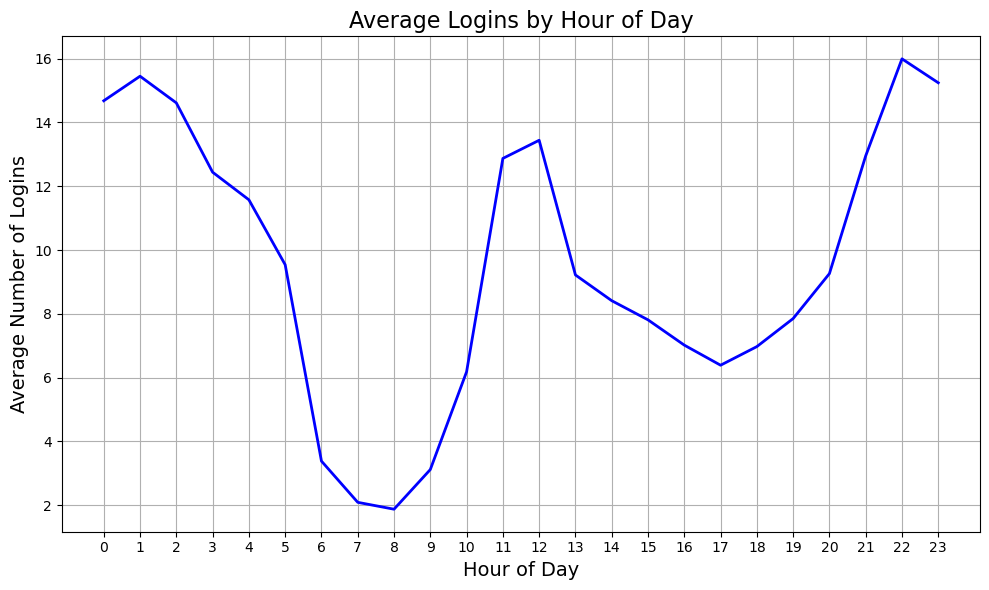

In [15]:
# create hour feature
logins_15min['hour'] = logins_15min.index.hour
hourly_login_pattern = logins_15min.groupby('hour')['visit'].mean()

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(hourly_login_pattern.index, hourly_login_pattern.values, color='blue', linewidth=2)
ax.set_title('Average Logins by Hour of Day', fontsize=16)
ax.set_xlabel('Hour of Day', fontsize=14)
ax.set_ylabel('Average Number of Logins', fontsize=14)
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


**High Activity:**
* The first peak occurs around midnight (0-1am) and stays high until about 2-3am, after which it gradually decreases. This suggests that late-night activity is quite high, which could be explained by users engaging in activities before going to bed or winding down after evening activities.
* The second peak occurs in the late evening (9-11pm). This suggests that users are logging in again before winding down for the day. Evening peaks often reflect post-work or leisure activity hours.

**Low Activity:**
* The lowest activity happens between 7am and 9am, which could reflect typical morning routines where users are less likely to log in (possibly commuting, preparing for the day, etc.).
* There's another smaller dip around 2-5pm, which could correspond to periods when users are busy with other activities like work or after-lunch slowdowns.

**Other Details:**
* After the 9 AM low, there’s a noticeable increase in login activity from 10 AM to 1 PM, possibly indicating users are getting back online mid-morning (after breakfast or commute), perhaps during work breaks or leisure.
* As noted before, there’s a strong increase in login activity between 8-11pm, which likely represents users logging back in after work and dinner.

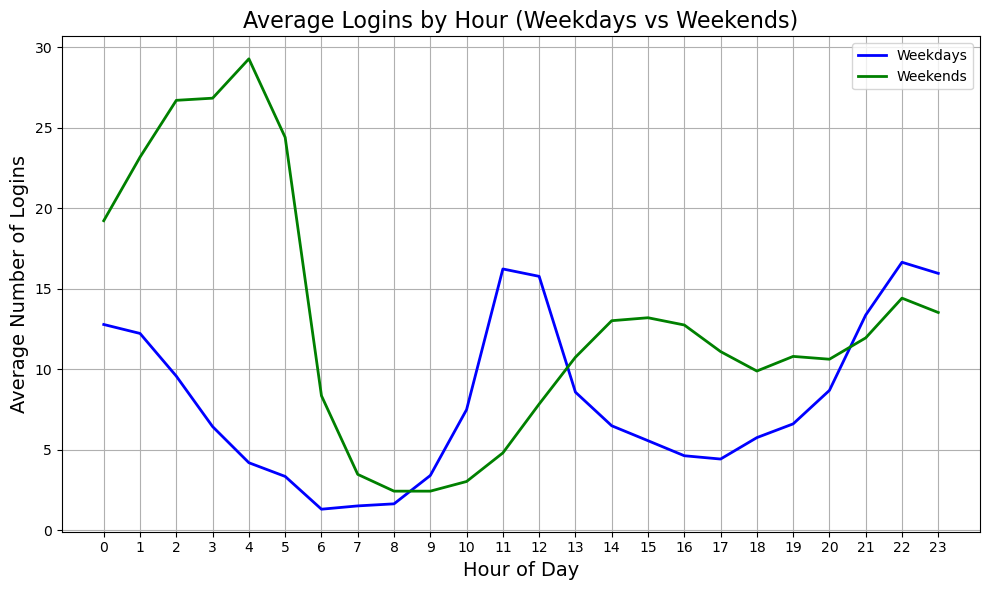

In [16]:
# create day_of_week feature
logins_15min['day_of_week'] = logins_15min.index.dayofweek

# separate weekdays and weekends
weekdays = logins_15min[logins_15min['day_of_week'] < 5]
weekends = logins_15min[logins_15min['day_of_week'] >= 5]
weekday_hourly = weekdays.groupby('hour')['visit'].mean()
weekend_hourly = weekends.groupby('hour')['visit'].mean()

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(weekday_hourly.index, weekday_hourly.values, label='Weekdays', color='blue', linewidth=2)
ax.plot(weekend_hourly.index, weekend_hourly.values, label='Weekends', color='green', linewidth=2)
ax.set_title('Average Logins by Hour (Weekdays vs Weekends)', fontsize=16)
ax.set_xlabel('Hour of Day', fontsize=14)
ax.set_ylabel('Average Number of Logins', fontsize=14)
plt.legend()
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


During **weekends**, the average number of logins is highest between midnight and 5am and again between 2pm and 5pm. 

During **weekdays**, the average number of logins surpasses weekend logins between 10am to 12pm and again between 9pm and 11pm. 

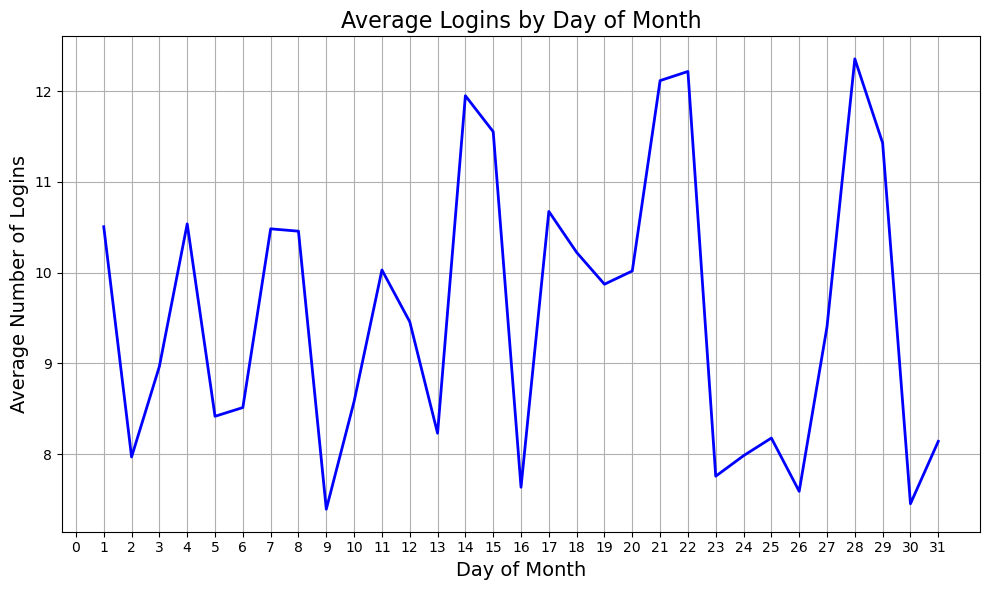

In [17]:
# create day of month feature
logins_15min['day'] = logins_15min.index.day
daily_login_pattern = logins_15min.groupby('day')['visit'].mean()

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(daily_login_pattern.index, daily_login_pattern.values, color='blue', linewidth=2)
ax.set_title('Average Logins by Day of Month', fontsize=16)
ax.set_xlabel('Day of Month', fontsize=14)
ax.set_ylabel('Average Number of Logins', fontsize=14)
plt.grid(True)
plt.xticks(range(0, 32))
plt.tight_layout()
plt.show()

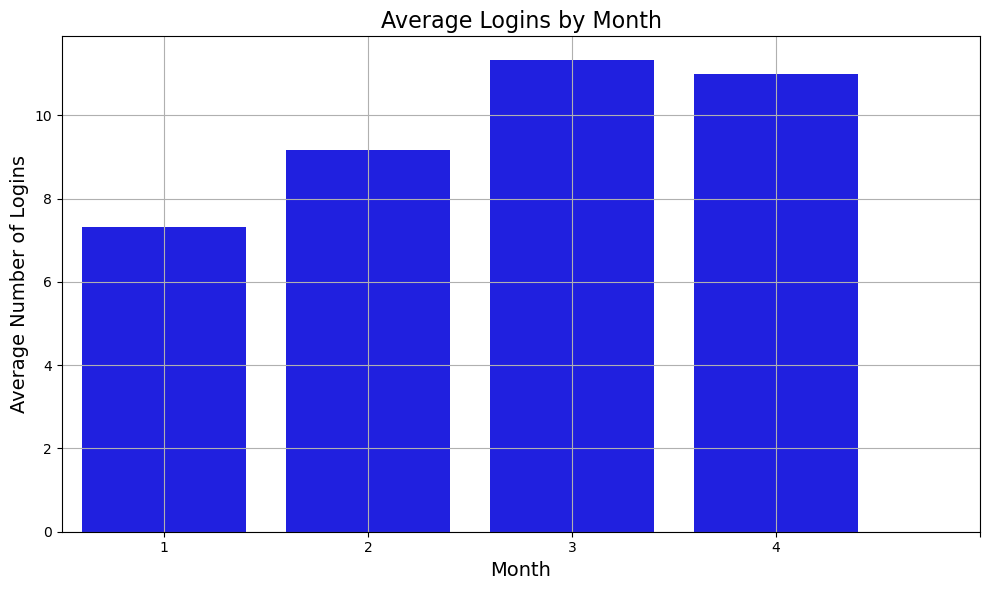

In [18]:
# create hour feature
logins_15min['month'] = logins_15min.index.month
monthly_login_pattern = logins_15min.groupby('month')['visit'].mean()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=monthly_login_pattern.index, y=monthly_login_pattern.values, color='blue', linewidth=2)
ax.set_title('Average Logins by Month', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Average Number of Logins', fontsize=14)
plt.grid(True)
plt.xticks(range(0, 5))
plt.tight_layout()
plt.show()


In [19]:
monthly_login_pattern

month
1     7.331606
2     9.177455
3    11.332997
4    11.001627
Name: visit, dtype: float64

The total number of average logins increased month over month. Although April shows a decrease, the data is only present for half of the month of April. Given that halfway thgrough the month the average number of logins was 11 and for March is was 11.3, if the data were present for the reset of April, average logins for the month would likely surpass March.

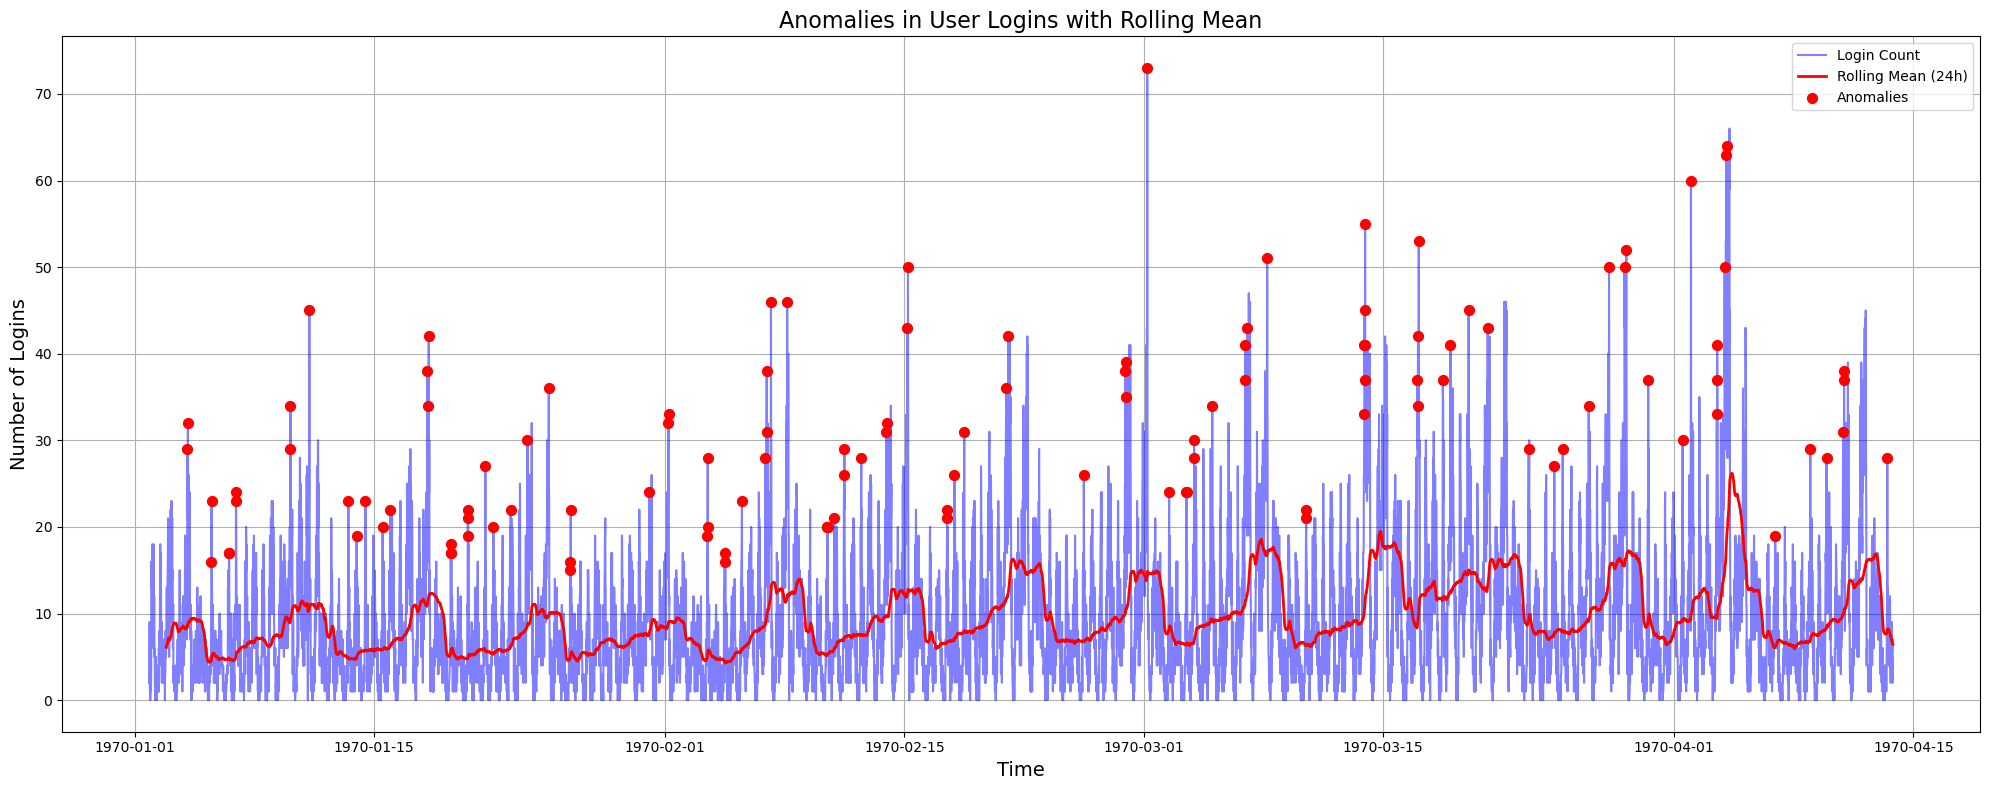

In [20]:
# Calculate rolling mean and rolling standard deviation
logins_15min['rolling_mean'] = logins_15min['visit'].rolling(window=96).mean()  # 24-hour window (15 min intervals)
logins_15min['rolling_std'] = logins_15min['visit'].rolling(window=96).std()

# Define an anomaly if the value is outside the rolling mean ± 2 * rolling standard deviation
threshold = 3
logins_15min['anomaly'] = logins_15min.apply(lambda x: True if (x['visit'] > x['rolling_mean'] + threshold * x['rolling_std']) or (x['visit'] < x['rolling_mean'] - threshold * x['rolling_std']) else False, axis=1)

# Plot anomalies on the original plot
fig, ax = plt.subplots(figsize=(20,8))
ax.plot(logins_15min.index, logins_15min['visit'], color='blue', label='Login Count', alpha=0.5)
ax.plot(logins_15min.index, logins_15min['rolling_mean'], color='red', label='Rolling Mean (24h)', linewidth=2)

# Highlight the anomalies
anomalies = logins_15min[logins_15min['anomaly'] == True]
ax.scatter(anomalies.index, anomalies['visit'], color='red', label='Anomalies', s=50, zorder=5)

ax.set_title('Anomalies in User Logins with Rolling Mean', fontsize=16)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Number of Logins', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
anomalies_by_month = logins_15min.groupby('month')['anomaly'].sum()
anomalies_by_month

month
1    34
2    34
3    35
4    15
Name: anomaly, dtype: int64

In [22]:
total_anomalies = logins_15min['anomaly'].sum()
print(f'There are a total of {total_anomalies} anomalies in the dataset where the number of logins for that 24 hour period was more than 3 standard deviations from the rolling 24-hour mean.')

There are a total of 118 anomalies in the dataset where the number of logins for that 24 hour period was more than 3 standard deviations from the rolling 24-hour mean.


To detect anomalies, the login counts were compared against a 24-hour rolling mean, which captures the daily patterns of user activity. Anomalies are defined as points where the login count significantly deviated from this rolling mean, using a threshold of 3 standard deviations to flag outlier behavior. These anomalies are visualized in red, alongside the raw login counts (blue) and the 24-hour rolling mean (red).

**Overview:**
* There are a total of 118 anomalies in the dataset where the number of logins for that 24 hour period was more than 3 standard deviations from the rolling 24-hour mean.
* Several sharp spikes in login counts were observed across the dataset. These points represent periods where the number of logins greatly exceeded the typical 15-minute interval counts.

**Frequency of Anomalies:**
* The frequency of anomalies is similar across months with approximately 34 anomalies per month. April there are only 15 anomalies, however, we only have data for half of the month of April.

**Correlation with Daily Cycles:**
* Many of the anomalies are aligned with daily peaks in login activity, which are captured by the rolling mean. This suggests that while the daily surges in logins are expected, certain time periods exhibit login counts that far exceed the normal fluctuations.
* These spikes could be driven by specific time-sensitive events that align with the platform’s usual high-activity windows.

# Part 2 - Experiments and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    * how you will implement the experiment
    * what statistical test(s) you will conduct to verify the significance of the observation
    * how you would interpret the results and provide recommendations to the city operations team along with any caveats.

### 1. Key Measure of Success:
The key measure of success for the experiment would be **the increase in the percentage of driver partners who serve both cities (Gotham and Metropolis)** during the experiment, compared to a baseline before the reimbursement was introduced.

- **Why choose this metric?**  
This metric measures whether the toll reimbursement encourages drivers to serve both cities by crossing the bridge. By focusing on the percentage of drivers who cross the toll bridge and serve both cities, we can quantify the effectiveness of the incentive. This also captures the impact of toll cost reimbursement on driver behavior without introducing confounding variables, such as the total number of trips or total revenue, which could be affected by other factors like seasonal demand.

### 2. Experiment Design:

#### a) **Implementation:**

- **Pre-experiment data collection (baseline):** Collect data on the current number of driver partners who serve both cities, as well as drivers exclusive to Gotham or Metropolis. Include data on the number of trips made in each city, times of day (to control for circadian rhythms), and the number of drivers crossing the toll bridge on both weekdays and weekends.
  
- **Experiment phase:** Reimburse toll costs for drivers serving both cities for a pre-determined period of time. Track the same metrics as in the baseline period, including the number of drivers crossing the toll bridge, the number of trips in each city, and any changes in the times of day or frequency drivers operate in both cities.

- **Control group:** If feasible, we could divide drivers into two groups: one that receives toll reimbursement (treatment group) and one that does not (control group). This would help isolate the effect of toll reimbursement from other factors affecting driver behavior.

#### b) **Statistical tests:**
- **Chi-squared test of independence:** Use this test to compare the proportion of drivers who serve both cities before and after the experiment. This will help assess whether there’s a significant increase in drivers crossing the toll bridge and operating in both cities.
  
- **Two-sample t-test (or Mann-Whitney U test if the data isn’t normally distributed):** Compare the average number of trips made by drivers in both cities during the baseline and experimental phases. This test will check whether there is a statistically significant difference in cross-city trip counts after the toll reimbursement policy is introduced.

- **Regression analysis:** You could also use regression analysis to control for variables like time of day, weekday/weekend, and city-specific demand patterns, allowing you to isolate the effect of the toll reimbursement on driver behavior.

#### c) **Interpreting results:**
- If the statistical tests show a significant increase in the percentage of drivers serving both cities, we can conclude that the toll reimbursement policy is effective in encouraging drivers to serve both Gotham and Metropolis.
  
- If the results are not significant, or if the effect size is small, we could conclude that toll costs may not be the primary factor deterring drivers from operating in both cities. In this case, we might want to invest in user research to understand other barriers (e.g., differences in demand, driver preferences, or operational efficiency between the cities) that are leading to the isolated service areas.

#### d) Caveats:
- **External factors:** Be aware of factors like local events (e.g. sporting events, music shows, etc), weather conditions, construction, or economic changes that could affect driving patterns during the experiment, potentially skewing the results.
  
- **Driver behavior bias:** If drivers in the control group become aware of the toll reimbursement in the treatment group, it could affect their driving patterns, potentially biasing the experiment’s outcome.

By focusing on clear metrics and a structured experimental design, we'll be able to provide the operations team with actionable insights and recommendations.

# Part 3 - Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

Data description
* `city`: city this user signed up in
* `phone`: primary device for this user
* `signup_date`: date of account registration; in the form ‘YYYYMMDD’
* `last_trip_date`: the last time this user completed a trip; in the form ‘YYYYMMDD’
* `avg_dist`: the average distance in miles per trip taken in the first 30 days after signup
* `avg_rating_by_driver`: the rider’s average rating over all of their trips
* `avg_rating_of_driver`: the rider’s average rating of their drivers over all of their trips
* `surge_pct`: the percent of trips taken with surge multiplier > 1
* `avg_surge`: The average surge multiplier over all of this user’s trips
* `trips_in_first_30_days`: the number of trips this user took in the first 30 days after signing up
* `ultimate_otherwise_black_user`: TRUE if the user took an Ultimate Black in their first 30 days; FALSE
* `weekday_pct`: the percent of the user’s trips occurring during a weekday

## Data Investigation

In [23]:
users.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [24]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [25]:
users['signup_date'] = pd.to_datetime(users['signup_date'])
users['last_trip_date'] = pd.to_datetime(users['last_trip_date'])

In [26]:
users.describe()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000,41878.000000,50000.000000,50000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,2014-01-16 13:04:20.352000,4.601559,1.074764,2014-04-19 08:02:04.992000256,8.849536,60.926084,5.796827,4.778158
min,0.000000,2014-01-01 00:00:00,1.000000,1.000000,2014-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2014-01-09 00:00:00,4.300000,1.000000,2014-02-14 00:00:00,0.000000,33.300000,2.420000,4.700000
50%,1.000000,2014-01-17 00:00:00,4.900000,1.000000,2014-05-08 00:00:00,0.000000,66.700000,3.880000,5.000000
75%,3.000000,2014-01-24 00:00:00,5.000000,1.050000,2014-06-18 00:00:00,8.600000,100.000000,6.940000,5.000000
max,125.000000,2014-01-31 00:00:00,5.000000,8.000000,2014-07-01 00:00:00,100.000000,100.000000,160.960000,5.000000
std,3.792684,NaN,0.617338,0.222336,NaN,19.958811,37.081503,5.707357,0.446652


In [27]:
object_cols = users.select_dtypes('object')
object_cols.describe()

,city,phone
count,50000,49604
unique,3,2
top,Winterfell,iPhone
freq,23336,34582


## Data Cleaning

In [28]:
# handle missing values
users['avg_rating_of_driver'].fillna(users['avg_rating_of_driver'].mean(), inplace=True)
users['avg_rating_by_driver'].fillna(users['avg_rating_by_driver'].mean(), inplace=True)
users['phone'].fillna('Unknown', inplace=True)

In [29]:
# create retained column
cutoff_date = users['last_trip_date'].max() - pd.Timedelta(days=30)
users['retained'] = users['last_trip_date'] >= cutoff_date

In [30]:
users.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


## Create Target Variable

In [31]:
retained_fraction = users['retained'].mean()
print(f"Fraction of users retained: {retained_fraction:.2%}")

Fraction of users retained: 37.61%


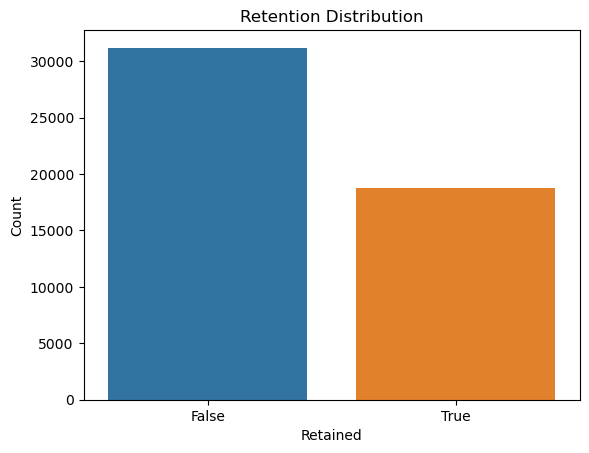

In [32]:
retention = users.groupby('retained').size().reset_index(name='count')

fig, ax = plt.subplots()
sns.barplot(data=retention, x='retained', y='count', hue='retained', legend=False)
ax.set_title('Retention Distribution')
ax.set_xlabel('Retained')
ax.set_ylabel('Count')
plt.show()

The retention distribution plot shows that a larger portion of the users were not retained (about two-thirds) compared to those who were retained. This suggests that retention might be a challenge, as a significant number of users drop off after their initial engagement with the service.

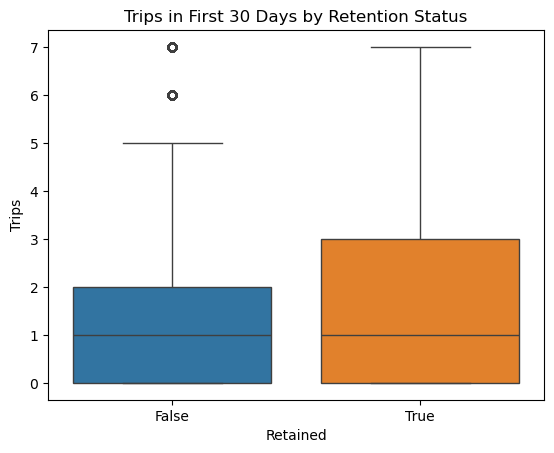

In [33]:
q1_trips = users['trips_in_first_30_days'].quantile(0.25)
q3_trips = users['trips_in_first_30_days'].quantile(0.75)
trips_IQR = q3_trips - q1_trips

filtered_trips = users[(users['trips_in_first_30_days'] >= (q1_trips - 1.5 * trips_IQR)) &
                       (users['trips_in_first_30_days'] <= (q3_trips + 1.5 * trips_IQR))]

fig, ax = plt.subplots()
sns.boxplot(data=filtered_trips, x='retained', y='trips_in_first_30_days', hue='retained', legend=False)
ax.set_title('Trips in First 30 Days by Retention Status')
ax.set_xlabel('Retained')
ax.set_ylabel('Trips')

plt.show()

The box plot illustrates that users who were retained generally took more trips within the first 30 days than those who were not retained. The median number of trips for retained users is higher, and the retained users show a slightly broader range of trips. 

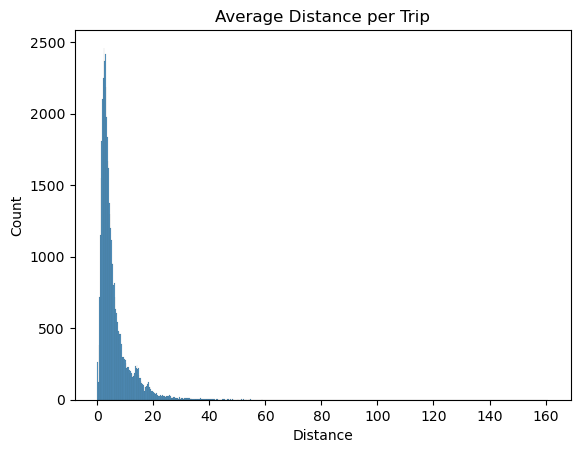

In [34]:
fig, ax = plt.subplots()
sns.histplot(data=users, x='avg_dist')
ax.set_title('Average Distance per Trip')
ax.set_xlabel('Distance')
ax.set_ylabel('Count')

plt.show()

The histogram of average distance per trip shows a heavily right-skewed distribution, with most trips being relatively short in distance. There is a long tail with a few users taking much longer trips. While this plot does not immediately show a relationship with retention, it highlights that a majority of users tend to take shorter trips, which could be an important feature when examining user behavior.

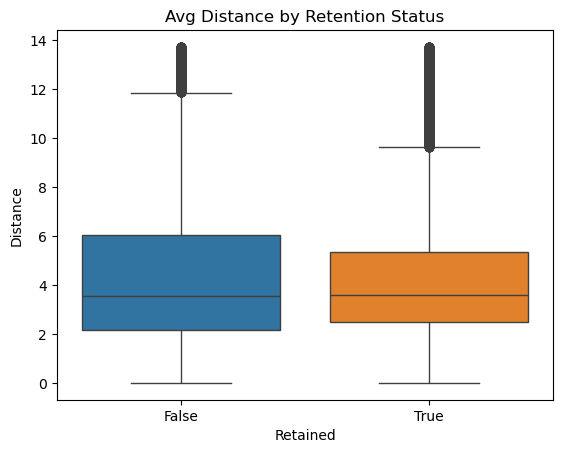

In [35]:
q1_trips = users['avg_dist'].quantile(0.25)
q3_trips = users['avg_dist'].quantile(0.75)
trips_IQR = q3_trips - q1_trips

filtered_trips = users[(users['avg_dist'] >= (q1_trips - 1.5 * trips_IQR)) &
                       (users['avg_dist'] <= (q3_trips + 1.5 * trips_IQR))]

fig, ax = plt.subplots()
sns.boxplot(data=filtered_trips, x='retained', y='avg_dist', hue='retained', legend=False)
ax.set_title('Avg Distance by Retention Status')
ax.set_xlabel('Retained')
ax.set_ylabel('Distance')

plt.show()

 The box plot shows that the distribution of average trip distance is quite similar between retained and non-retained users. Both groups have a median average trip distance of around 3 to 4 miles, with a few outliers taking much longer trips. This suggests that trip distance may not be a strong predictor of retention.

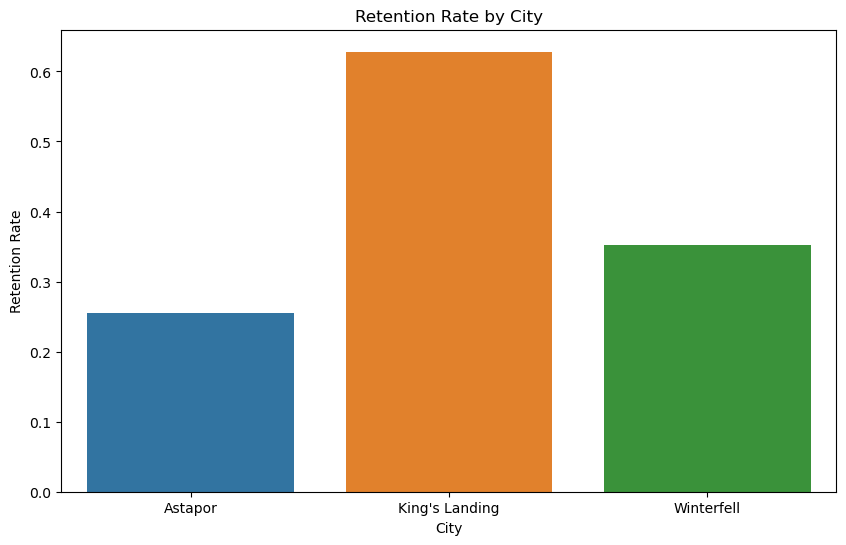

In [36]:
# Bar plot of retention by city
city_retention = users.groupby('city')['retained'].mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=city_retention, x='city', y='retained', hue='city')
ax.set_title('Retention Rate by City')
ax.set_xlabel('City')
ax.set_ylabel('Retention Rate')
plt.show()

The bar chart shows significant differences in retention rates across cities. King's Landing has a retention rate of over 60%, significantly higher than Astapor and Winterfell, where retention rates are approximately 28% and 38% respectively. This may indicate that users in King's Landing are more likely to stay engaged, suggesting that geography plays a significant role in user retention.

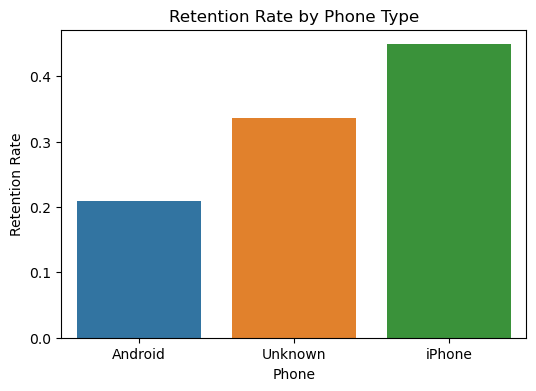

In [37]:
# Bar plot of retention by phone type
phone_retention = users.groupby('phone')['retained'].mean().reset_index()

fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(data=phone_retention, x='phone', y='retained', hue='phone')
ax.set_title('Retention Rate by Phone Type')
ax.set_xlabel('Phone')
ax.set_ylabel('Retention Rate')
plt.show()

The retention rate is notably higher for iPhone users (around 45%) compared to Android users (below 30%). The “Unknown” phone type group falls in between these two. This indicates that users’ device preferences might influence retention, with iPhone users being more likely to remain active.

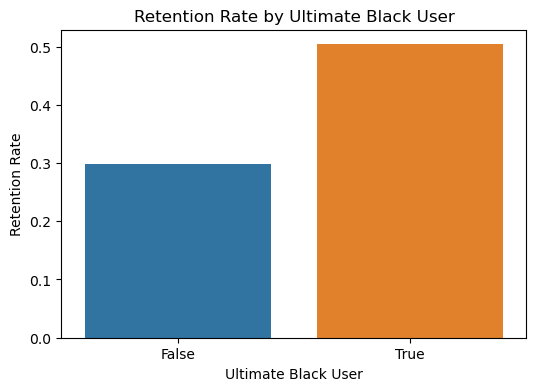

In [38]:
# Bar plot of retention by Ultimate Black usage
black_user_retention = users.groupby('ultimate_black_user')['retained'].mean().reset_index()

fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(data=black_user_retention, x='ultimate_black_user', y='retained', hue='ultimate_black_user', legend=False)
ax.set_title('Retention Rate by Ultimate Black User')
ax.set_xlabel('Ultimate Black User')
ax.set_ylabel('Retention Rate')
plt.show()


Users who took an Ultimate Black ride in their first 30 days have a retention rate close to 50%, which is significantly higher than the retention rate of users who did not use Ultimate Black (around 30%). This suggests that offering premium services like Ultimate Black may help improve user retention. Additionally, understanding why users are not using Ultimate Black services may provide insights into user behavior. 

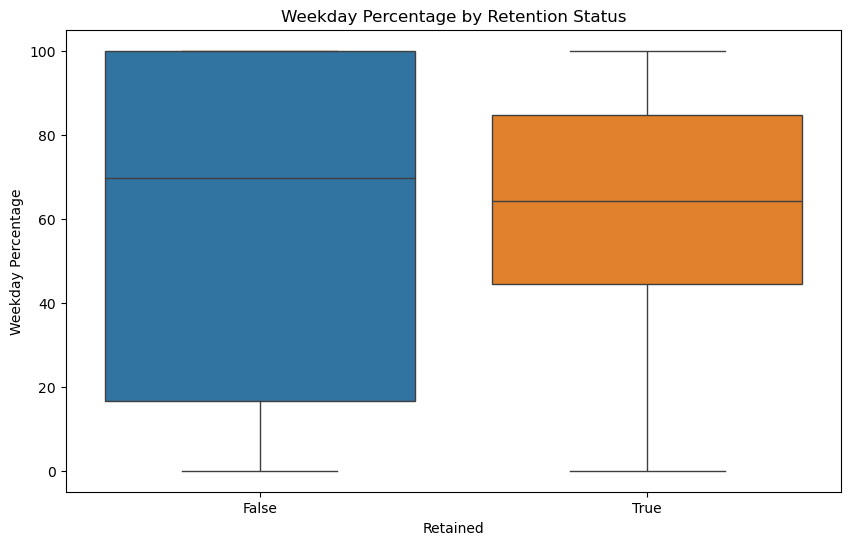

In [39]:
# Box plot of weekday percentage vs retention
plt.figure(figsize=(10, 6))
sns.boxplot(x='retained', y='weekday_pct', data=users, hue='retained', legend=False)
plt.title('Weekday Percentage by Retention Status')
plt.xlabel('Retained')
plt.ylabel('Weekday Percentage')
plt.show()

The box plot illustrates that retained users tend to have a more balanced distribution of trips across both weekdays and weekends, with a median of around 70-80% of their trips happening on weekdays. Non-retained users, on the other hand, show a wider range, with many taking up to 100% of their trips on weekdays and others taking very few weekday trips. This could indicate that a more regular usage pattern, distributed throughout the week, might be a factor in retaining users.

## Feature Engineering & Preprocessing

In [40]:
users.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


In [41]:
# Define a 5-month cutoff period (around 150 days)
cutoff_period = pd.Timedelta(days=150)

# Calculate the 5th month cutoff date for each user based on their signup date
users['cutoff_date_5_months'] = users['signup_date'] + cutoff_period

# Filter features based on the cutoff date (e.g., only consider trips and engagement data before the cutoff)
# Calculate trips up to the cutoff (5 months)
users['trips_in_first_5_months'] = users.apply(lambda row: row['trips_in_first_30_days'] 
                                                if row['last_trip_date'] <= row['cutoff_date_5_months'] 
                                                else 0, axis=1)

# Calculate days since last trip, considering the cutoff date (if the last trip date is after the cutoff, treat it as NaN)
users['days_since_last_trip_5_months'] = (users['cutoff_date_5_months'] - users['last_trip_date']).dt.days
users.loc[users['last_trip_date'] > users['cutoff_date_5_months'], 'days_since_last_trip_5_months'] = -1

users['days_as_user'] = (users['cutoff_date_5_months'] - users['signup_date']).dt.days


In [42]:
# calculate trip frequency
users['trips_per_month'] = users['trips_in_first_5_months'] / 5
users['trips_per_week'] = users['trips_in_first_5_months'] / (5 * 4.33)

In [43]:
# Example: Average number of days between trips
users['avg_days_between_trips'] = users['days_as_user'] / users['trips_in_first_5_months']
users['avg_days_between_trips'] = users['avg_days_between_trips'].replace(np.inf, 0)

In [44]:
# create binary feature for whether the user has rated a driver
users['has_rated_driver'] = users['avg_rating_of_driver'].notna().astype(int)

In [45]:
# get dummies for categorical variables
users_encoded = pd.get_dummies(users, columns=['city', 'phone'], drop_first=True, dtype=int)

In [46]:
boolean_cols = ['ultimate_black_user', 'retained', 'city_King\'s Landing', 'city_Winterfell', 'phone_Unknown', 'phone_iPhone']
users_encoded[boolean_cols] = users_encoded[boolean_cols].astype(int)

In [47]:
users_encoded.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,...,days_since_last_trip_5_months,days_as_user,trips_per_month,trips_per_week,avg_days_between_trips,has_rated_driver,city_King's Landing,city_Winterfell,phone_Unknown,phone_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,...,7,150,0.8,0.184758,37.500000,1,1,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,...,54,150,0.0,0.000000,0.000000,1,0,0,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,...,149,150,0.6,0.138568,50.000000,1,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,...,-1,150,0.0,0.000000,0.000000,1,1,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,...,103,150,2.8,0.646651,10.714286,1,0,1,0,0


In [48]:
users_encoded.isna().sum()

trips_in_first_30_days           0
signup_date                      0
avg_rating_of_driver             0
avg_surge                        0
last_trip_date                   0
surge_pct                        0
ultimate_black_user              0
weekday_pct                      0
avg_dist                         0
avg_rating_by_driver             0
retained                         0
cutoff_date_5_months             0
trips_in_first_5_months          0
days_since_last_trip_5_months    0
days_as_user                     0
trips_per_month                  0
trips_per_week                   0
avg_days_between_trips           0
has_rated_driver                 0
city_King's Landing              0
city_Winterfell                  0
phone_Unknown                    0
phone_iPhone                     0
dtype: int64

In [49]:
users_clean = users_encoded.drop(columns=['signup_date', 'last_trip_date', 'cutoff_date_5_months', 'trips_in_first_5_months', 'days_since_last_trip_5_months'])

# Modeling

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

In [51]:
# create X and y for features and targets and create train/test splits
X = users_clean.drop(columns=['retained'])
y = users_clean['retained']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
print('Training size: ', X_train.shape, y_train.shape)
print('Testing size: ', X_test.shape, y_test.shape)

Training size:  (35000, 17) (35000,)
Testing size:  (15000, 17) (15000,)


In [53]:
scaler = StandardScaler()

# numerical columns to scale
numerical_cols = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'trips_in_first_30_days', 
                  'surge_pct', 'avg_surge', 'weekday_pct', 'days_as_user', 'trips_per_month', 'trips_per_week', 'avg_days_between_trips']

# fit scaler on train data and transform train/test splits
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [54]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")

# Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

# Gradient Boosting
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
y_pred_gb = gb_clf.predict(X_test)
print("Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.2f}")

Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      9379
           1       0.86      0.65      0.74      5621

    accuracy                           0.83     15000
   macro avg       0.84      0.79      0.81     15000
weighted avg       0.83      0.83      0.82     15000

Accuracy: 0.83
Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      9379
           1       0.79      0.71      0.74      5621

    accuracy                           0.82     15000
   macro avg       0.81      0.80      0.80     15000
weighted avg       0.82      0.82      0.82     15000

Accuracy: 0.82
Gradient Boosting:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      9379
           1       0.86      0.70      0.77      5621

    accuracy                           0.84     15000
   macro avg       0.85      0.81      0.83

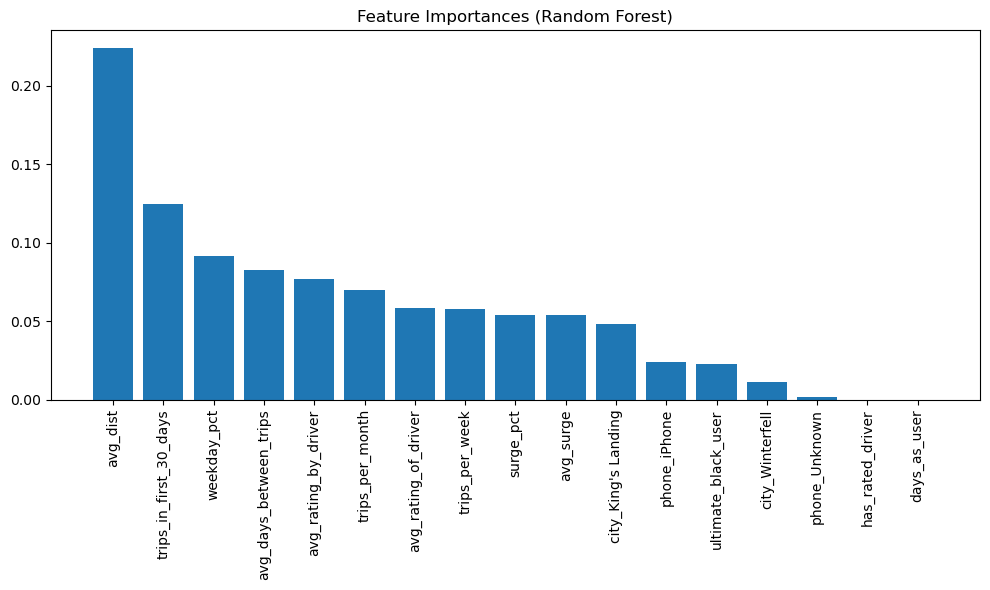

In [55]:
importances = rf_clf.feature_importances_

# Get the feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the top features
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

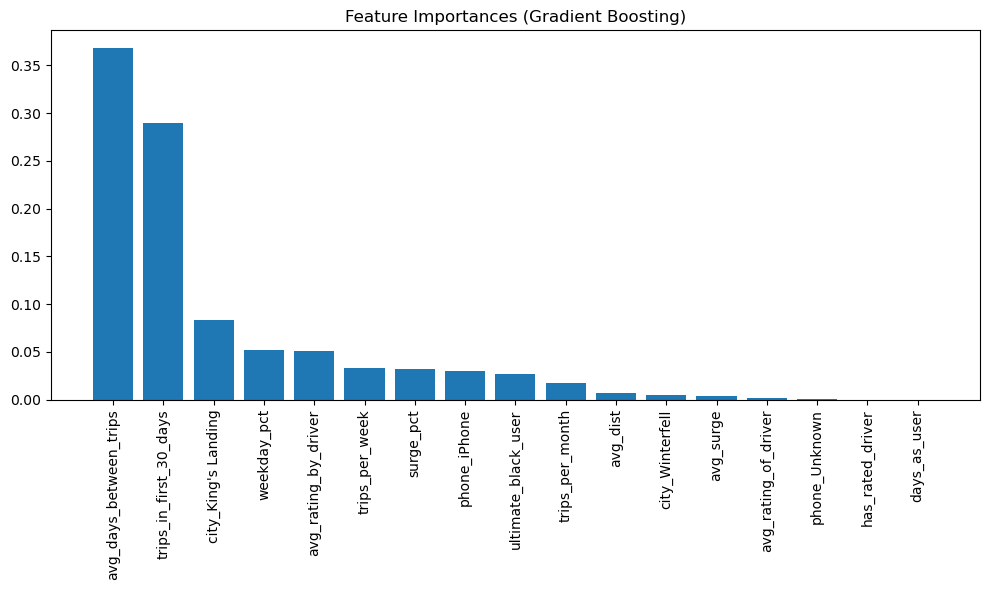

In [56]:
# Get feature importances from the Gradient Boosting model
importances = gb_clf.feature_importances_

# The same code to plot the importance
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Gradient Boosting)")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

# Predictive Model for User Retention in the 6th Month:
To predict whether a user will be active in their 6th month on the system, I experimented with three different models: Logistic Regression, Random Forest, and Gradient Boosting. I chose these models for their balance between simplicity and the ability to capture complex, non-linear relationships between features.

#### 1. **Why I Chose These Approaches**:
- **Logistic Regression**: This model is a baseline due to its interpretability and ability to provide clear insights into how each feature influences the target variable. It serves as a useful comparison to more complex models.
- **Random Forest**: As a decision tree-based ensemble method, Random Forest handles non-linearity in the data and is more robust to overfitting compared to individual decision trees. It provides feature importance that helps in understanding which factors drive retention.
- **Gradient Boosting**: This model is known for its high predictive power by sequentially improving on weak learners. It tends to perform better than Random Forest in many scenarios, though it is more sensitive to hyperparameters and overfitting.

#### 2. **Results and Model Performance**:

| Model               | Accuracy | Precision  | Recall  | F1-score  |
|---------------------|----------|---------------------|------------------|--------------------|
| Logistic Regression  | 0.83     | 0.86                | 0.65             | 0.74               |
| Random Forest        | 0.82     | 0.79                | 0.71             | 0.74               |
| Gradient Boosting    | 0.84     | 0.86                | 0.70             | 0.77               |

- **Logistic Regression**: Achieved an accuracy of **83%**. It performed well in terms of precision (0.86), meaning it correctly identifies a high proportion of retained users. However, the recall for retained users (1) is **65%**, indicating that it misses a significant number of true positives (users who should have been predicted as retained but were not).
  
- **Random Forest**: With **82% accuracy**, this model showed balanced performance. It had a **recall of 71%**, meaning it captured more retained users than Logistic Regression, though it sacrifices a bit of precision.

- **Gradient Boosting**: This model provided the best overall performance with an **accuracy of 84%**. It balanced precision (0.86) and recall (0.70) better than Logistic Regression. Its **F1-score** for retained users was the highest, at **0.77**, making it the best choice for predicting retention while minimizing false negatives and false positives.

#### 3. **Key Indicators of Model Validity**:
- **Precision**: Indicates how many of the predicted retained users were actually retained. Higher precision is important when the goal is to avoid false positives, e.g., focusing efforts only on those most likely to stay.
- **Recall**: Measures how well the model captures all actual retained users. A higher recall is valuable if we want to ensure that most of the active users are correctly identified for retention campaigns.
- **F1-Score**: This balances precision and recall, and it is especially useful when we want to strike a balance between correctly identifying retained users and minimizing the cost of false positives.
  
**Gradient Boosting** emerges as the most effective model for predicting 6th-month retention, given its strong balance between precision and recall, and overall accuracy. The results show that it can successfully capture important factors leading to retention while minimizing misclassifications.

#### 4. **Feature Importance**:
- The feature importance analysis revealed that **`avg_days_between_trips`**, **`trips_in_first_30_days`**, and **`weekday_pct`** are among the most influential features in both Random Forest and Gradient Boosting models. This aligns with the intuition that users with regular engagement and a high number of early trips are more likely to stay active.
  
- In addition, the **city** and **device type** (e.g., iPhone users) also provided meaningful signals regarding retention, indicating that some user groups might have different engagement levels.

### Concerns and Alternatives:
- **Data Imbalance**: There may be an imbalance between retained and non-retained users in the dataset, which could skew the results. Techniques like oversampling or undersampling could help balance the classes and improve recall for retained users.
  
- **Overfitting**: While Gradient Boosting performed well, it can be prone to overfitting, especially with smaller datasets or too many features. Further fine-tuning of hyperparameters (e.g., learning rate, number of trees) could help ensure the model generalizes well to new data.

### Conclusion:
The **Gradient Boosting** model is the best candidate to help Ultimate predict whether a user will be active in their 6th month. It provides a good balance between precision, recall, and overall accuracy. By focusing on features like trip regularity, early engagement, and user behavior patterns, the model offers actionable insights into which factors drive long-term user retention.

Ultimate can leverage the insights from the model by focusing on key drivers of retention, such as early engagement (e.g., increasing trips in the first 30 days) and regular trip frequency. By targeting users who show signs of decreased activity (e.g., longer gaps between trips), Ultimate can offer personalized incentives, such as discounts or promotions, to encourage continued and more frequent use. Additionally, identifying segments like users who frequently ride during weekdays or who have high average trip distances could allow Ultimate to tailor marketing strategies, ensuring targeted retention efforts for these user groups.